In [80]:
!pip install geopandas
!pip install pysal

In [81]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [82]:
!pip install --ignore-installed geopandas

  Using cached https://files.pythonhosted.org/packages/5b/0c/e6c99e561b03482220f00443f610ccf4dce9b50f4b1093d735f93c6fc8c6/geopandas-0.6.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/9b/9a/04dcffd4ff9bc064c05f723be71177cfb593d5ce6e4d6185c3ef8b7a4be9/pyproj-2.2.2-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/81/d1/b8e1b089a8ddd6df74be583d70373eac55c725c6197c115efbd3c3e1509f/Shapely-1.6.4.post2-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/db/83/7d4008ffc2988066ff37f6a0bb6d7b60822367dcb36ba5e39aa7801fda54/pandas-0.24.2-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/89/dd/289641061a69bb9b302e9fd52e5532f8345f6b277d8f4c98419fbbef1a14/Fiona-1.8.13-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/6a/c8/1b8513155e4bc68f322e2fbaf90708dd66290a0edaa604ea1675357d18ee/aenum-2.2.3-py2-none-any.whl
  Usin

In [83]:
!pip install pysal==2.0.0

  Could not find a version that satisfies the requirement pysal==2.0.0 (from versions: 1.4.1, 1.5.0, 1.6.0, 1.7.0, 1.8.0, 1.9.1, 1.10.0, 1.11.0, 1.11.1, 1.11.2, 1.12.0, 1.13.0, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.14.4, 1.14.4.post1, 1.14.4.post2)
No matching distribution found for pysal==2.0.0


In [84]:
!pip install descartes

In [85]:
import geopandas as gp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import pylab
import descartes
import numpy as np
#import seaborn as sns
#import time
#import os

%matplotlib inline

plt.style.use('ggplot')
pylab.rcParams['figure.figsize'] = (20., 16.)

In [86]:
data = "data/borough_heatmap/London_Borough_Excluding_MHW.shp"

mapBoroughs = gp.read_file(data)
mapBoroughs.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18..."


In [87]:
mapBoroughs.crs

{u'init': u'epsg:27700'}

In [88]:
mapBoroughs.crs = {'init': u'epsg:4326'}
target_crs = {'datum':'WGS84', 'no_defs':True, 'proj':'merc'}
projected_mapBoroughs = mapBoroughs.to_crs(crs=target_crs)

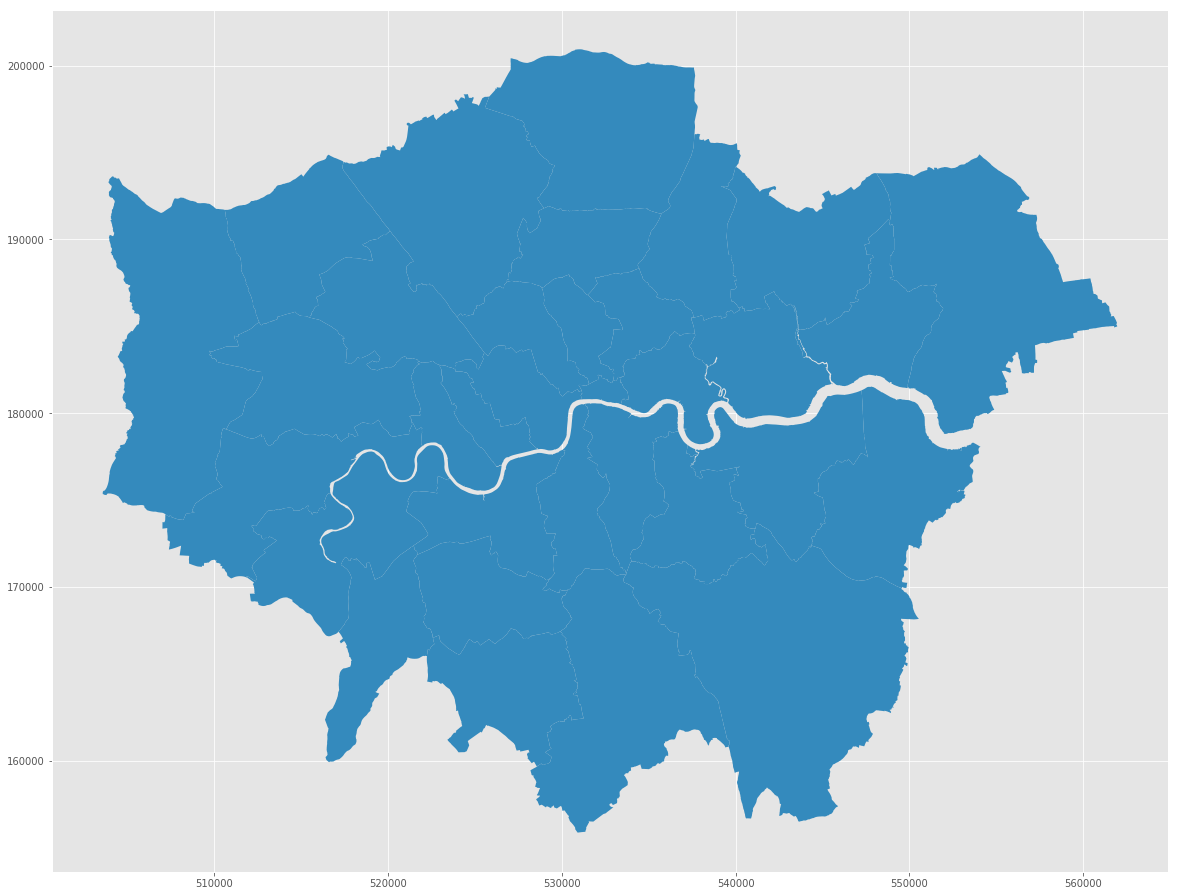

In [89]:
mapBoroughs.plot()

In [90]:
data_path = "./data/wk9/london_wards.shp"

#londonWards = gp.GeoDataFrame.from_file(data_path)
londonWards = gp.read_file(data_path)

londonWards

,NAME,AREA_CODE,DESCRIPTIO,FILE_NAME,NUMBER,NUMBER0,POLYGON_ID,UNIT_ID,CODE,HECTARES,AREA,TYPE_CODE,DESCRIPT0,TYPE_COD0,DESCRIPT1,geometry
0,Chessington South Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,52,733,50840,10884,E05000405,755.173,0.000,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.33068 51.32901, -0.33059 51.32909..."
1,Tolworth and Hook Rise Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,106,734,117160,11407,E05000414,259.464,0.000,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.30846 51.37586, -0.30834 51.37606..."
2,Berrylands Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,107,735,50449,11413,E05000401,145.390,0.000,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.30385 51.39249, -0.30375 51.39252..."
3,Alexandra Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,108,736,50456,11420,E05000400,268.506,0.000,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.26990 51.38845, -0.26975 51.38838..."
4,Beverley Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,109,737,117161,11417,E05000402,187.821,0.000,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.24662 51.39921, -0.24672 51.39921..."
5,Coombe Hill Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,118,738,117159,11423,E05000406,442.170,0.000,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.24714 51.40958, -0.24820 51.41018..."
6,Chessington North and Hook Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,308,739,50530,11406,E05000404,192.980,0.000,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.31830 51.36368, -0.31841 51.36468..."
7,Surbiton Hill Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,309,740,50457,11421,E05000413,166.482,0.000,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.31316 51.38880, -0.30599 51.39168..."
8,Old Malden Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,310,741,50455,11419,E05000410,180.016,0.000,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.24505 51.38004, -0.24553 51.38006..."
9,St. Mark's Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,313,742,50450,11414,E05000412,137.578,0.000,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.31298 51.39711, -0.31256 51.39688..."


In [91]:
data_path = "./data/borough_heatmap/MPS Borough Level Crime (most recent 24 months).csv"

sexassaults = pd.read_csv(data_path)
sexassaults= sexassaults[sexassaults['MajorText']=='Sexual Offences']
sexassaults.head()

,MajorText,MinorText,LookUp_BoroughName,201712,201801,201802,201803,201804,201805,201806,...,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911
35,Sexual Offences,Other Sexual Offences,Barking and Dagenham,17,17,17,30,28,30,36,...,21,27,23,32,41,36,18,33,40,34
36,Sexual Offences,Rape,Barking and Dagenham,21,24,10,17,19,27,15,...,32,28,27,19,26,23,23,30,34,23
84,Sexual Offences,Other Sexual Offences,Barnet,33,36,28,37,23,37,37,...,32,26,23,37,27,27,34,26,25,32
85,Sexual Offences,Rape,Barnet,19,17,16,23,35,54,18,...,12,19,11,16,15,13,18,14,30,26
129,Sexual Offences,Other Sexual Offences,Bexley,20,24,19,27,23,26,22,...,18,18,18,16,19,26,11,20,25,24


In [92]:
sexassaults=sexassaults.set_index(['LookUp_BoroughName'])
sexassaults['2019']=(sexassaults['201901']+sexassaults['201902']+sexassaults['201903']+sexassaults['201904']
                     +sexassaults['201905']+sexassaults['201906']+sexassaults['201907']+sexassaults['201908']
                     +sexassaults['201909']+sexassaults['201910']+sexassaults['201911'])
sexassaults= sexassaults.drop(columns=['201712', '201802','201801','201802','201803','201804','201805',
                                       '201806','201807','201808','201809','201810','201811','201812',
                                       '201901','201902','201903','201904','201905','201906','201907',
                                       '201908','201909','201910','201911'])
sexassaults.head()

,MajorText,MinorText,2019
LookUp_BoroughName,,,
Barking and Dagenham,Sexual Offences,Other Sexual Offences,331
Barking and Dagenham,Sexual Offences,Rape,286
Barnet,Sexual Offences,Other Sexual Offences,323
Barnet,Sexual Offences,Rape,188
Bexley,Sexual Offences,Other Sexual Offences,218


In [93]:
total = sexassaults.groupby(['LookUp_BoroughName'])['2019'].sum()
sexassaults['Total'] = total
sexassaults = sexassaults [cols]
sexassaults.head()

,MinorText,Total,2019,MajorText
LookUp_BoroughName,,,,
Barking and Dagenham,Other Sexual Offences,617,331,Sexual Offences
Barking and Dagenham,Rape,617,286,Sexual Offences
Barnet,Other Sexual Offences,511,323,Sexual Offences
Barnet,Rape,511,188,Sexual Offences
Bexley,Other Sexual Offences,354,218,Sexual Offences


In [94]:
geosexassaults = mapBoroughs.merge(sexassaults, left_on= 'NAME', right_on= 'LookUp_BoroughName', how= 'inner')
geosexassaults

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,MinorText,Total,2019,MajorText
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",Other Sexual Offences,338,202,Sexual Offences
1,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",Rape,338,136,Sexual Offences
2,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15...",Other Sexual Offences,979,523,Sexual Offences
3,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15...",Rape,979,456,Sexual Offences
4,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15...",Other Sexual Offences,511,347,Sexual Offences
5,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15...",Rape,511,164,Sexual Offences
6,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17...",Other Sexual Offences,491,298,Sexual Offences
7,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17...",Rape,491,193,Sexual Offences
8,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18...",Other Sexual Offences,666,398,Sexual Offences
9,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18...",Rape,666,268,Sexual Offences


In [95]:
#import io

In [96]:
#geosexassaults['geometry'] = gp.Series(londonWards['geometry Wards'])

In [100]:
type(geosexassaults)

geopandas.geodataframe.GeoDataFrame

In [101]:
#geosexassaults=geosexassaults.set_index(['NAME'])
##geosexassaults['2019']=(geosexassaults['201901']+geosexassaults['201902']+geosexassaults['201903']+geosexassaults['201904']+geosexassaults['201905']+geosexassaults['201906']+geosexassaults['201907']+geosexassaults['201908']+geosexassaults['201909']+geosexassaults['201910']+geosexassaults['201911'])
#geosexassaults

In [102]:
cols = geosexassaults.columns.tolist()
cols = cols[-1:] + cols[:-1]
geosexassaults = geosexassaults [cols]
#changed column order for .sum .groupby need elemnt to be index and 2019 column to be right next one to itù
#geosexassaults

In [103]:
#to only have 2019 total to be clearer
geosexassaults= geosexassaults.drop(columns=['index','201712', '201802','201801','201802','201803','201804','201805','201806','201807','201808','201809','201810','201811','201812','201901','201902','201903','201904','201905','201906','201907','201908','201909','201910','201911'])

KeyError: "['index' '201712' '201802' '201801' '201802' '201803' '201804' '201805'\n '201806' '201807' '201808' '201809' '201810' '201811' '201812' '201901'\n '201902' '201903' '201904' '201905' '201906' '201907' '201908' '201909'\n '201910' '201911'] not found in axis"

In [104]:
pd = geosexassaults.groupby(['LookUp_BoroughName'])['2019'].sum()
pd
geosexassaults['Total'] = pd
cols = geosexassaults.columns.tolist()
cols = cols[-1:] + cols[:-1]
geosexassaults = geosexassaults [cols]
geosexassaults

KeyError: 'LookUp_BoroughName'

In [ ]:
df = geosexassaults.drop('geometry', axis=1)
#otherwiseimpossible to convert geodataframe to csv need object, string 

In [ ]:
data_path = "./newsexassaults_2019.csv"
df.to_csv(data_path)

In [105]:
#geosexassaults = geosexassaults.astype(object)
#otherwise think it is a vector
#data_path = "./newsexassaults_2019.csv"
#geosexassaults.to_csv(data_path)

In [106]:
#geosexassaults.to_csv(data_path)
#geosexassaults.astype({'geometry': str}).to_csv()

In [107]:
original_crs = geosexassaults.crs
target_crs = {'datum':'WGS84', 'no_defs':True, 'proj':'merc'}
projected_geosexassaults = geosexassaults.to_crs(crs=target_crs)
geosexassaults

,MajorText,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,MinorText,Total,2019
NAME,,,,,,,,,,,
Kingston upon Thames,Sexual Offences,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",Other Sexual Offences,338,202
Kingston upon Thames,Sexual Offences,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",Rape,338,136
Croydon,Sexual Offences,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15...",Other Sexual Offences,979,523
Croydon,Sexual Offences,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15...",Rape,979,456
Bromley,Sexual Offences,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15...",Other Sexual Offences,511,347
Bromley,Sexual Offences,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15...",Rape,511,164
Hounslow,Sexual Offences,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17...",Other Sexual Offences,491,298
Hounslow,Sexual Offences,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17...",Rape,491,193
Ealing,Sexual Offences,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18...",Other Sexual Offences,666,398


In [108]:
#Install the geopandas module
!pip install --ignore-installed geopandas

#Uninstall any existing version; forcing Yes
!pip uninstall --yes pysal

#Install newest branch
!pip install pysal==1.14.4

  Using cached https://files.pythonhosted.org/packages/5b/0c/e6c99e561b03482220f00443f610ccf4dce9b50f4b1093d735f93c6fc8c6/geopandas-0.6.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/9b/9a/04dcffd4ff9bc064c05f723be71177cfb593d5ce6e4d6185c3ef8b7a4be9/pyproj-2.2.2-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/81/d1/b8e1b089a8ddd6df74be583d70373eac55c725c6197c115efbd3c3e1509f/Shapely-1.6.4.post2-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/db/83/7d4008ffc2988066ff37f6a0bb6d7b60822367dcb36ba5e39aa7801fda54/pandas-0.24.2-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/89/dd/289641061a69bb9b302e9fd52e5532f8345f6b277d8f4c98419fbbef1a14/Fiona-1.8.13-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/6a/c8/1b8513155e4bc68f322e2fbaf90708dd66290a0edaa604ea1675357d18ee/aenum-2.2.3-py2-none-any.whl
  Usin

Text(0.5,1,'2019 sexual assaults')

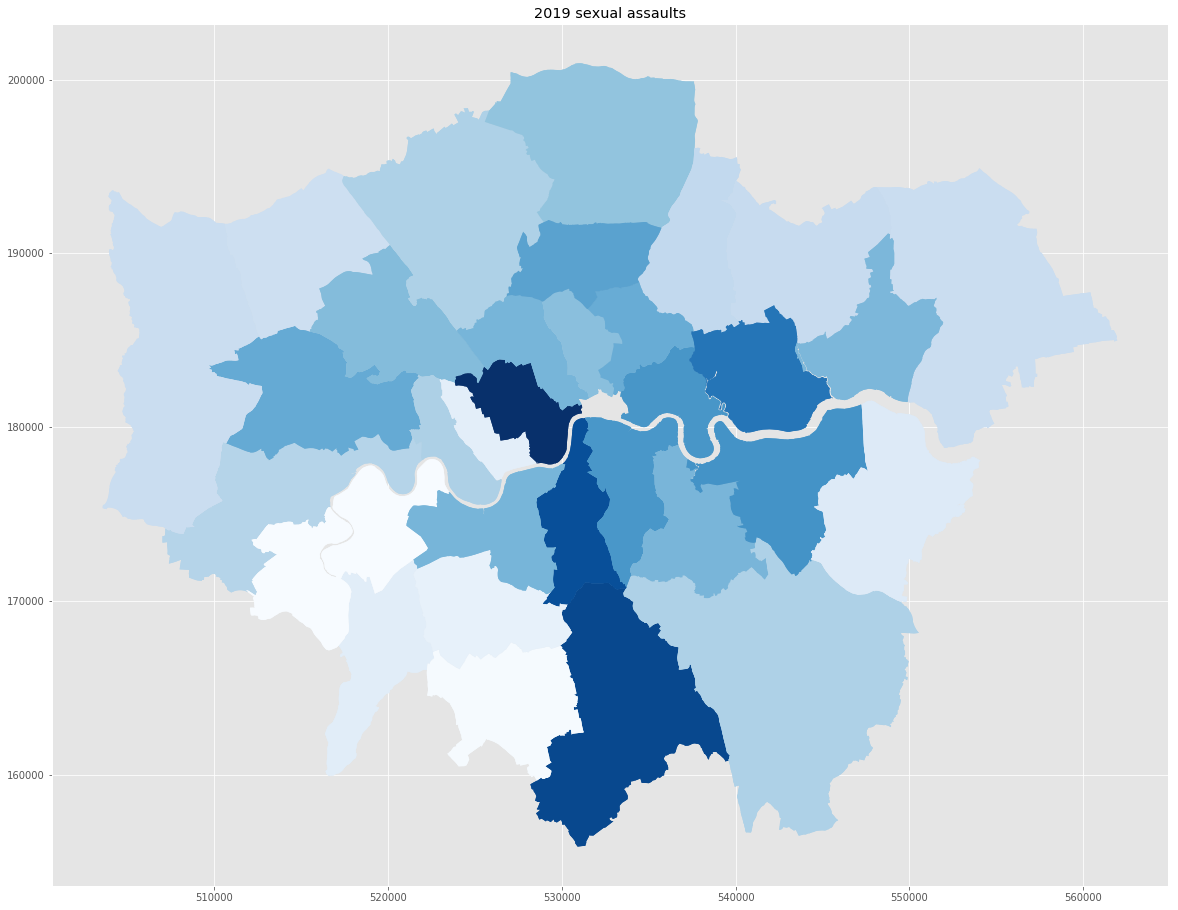

In [109]:
geosexassaults.plot(column='Total', colormap = 'Blues')
#, scheme= 'Quantiles')
plt.title('2019 sexual assaults')

#plt.savefig('./data/heat_map/2019map_sexassaults.png')

In [110]:
# Convenience functions for working with colour ramps and bars
def colorbar_index(ncolors, cmap, labels=None, **kwargs):
    """
    This is a convenience function to stop you making off-by-one errors
    Takes a standard colour ramp, and discretizes it,
    then draws a colour bar with correctly aligned labels
    """
    cmap = cmap_discretize(cmap, ncolors)
    mappable = plt.cm.ScalarMappable(cmap=cmap)
    mappable.set_array([])
    mappable.set_clim(-0.5, ncolors+0.5)
    colorbar = matplotlib.pyplot.colorbar(mappable, **kwargs)
    colorbar.set_ticks(np.linspace(0, ncolors, ncolors))
    colorbar.set_ticklabels(range(ncolors))
    if labels:
        colorbar.set_ticklabels(labels)
    return colorbar

def cmap_discretize(cmap, N):
    """
    Return a discrete colormap from the continuous colormap cmap.

        cmap: colormap instance, eg. cm.jet. 
        N: number of colors.

    Example
        x = resize(arange(100), (5,100))
        djet = cmap_discretize(cm.jet, 5)
        imshow(x, cmap=djet)

    """
    if type(cmap) == str:
        cmap = get_cmap(cmap)
    colors_i = np.concatenate((np.linspace(0, 1., N), (0., 0., 0., 0.)))
    colors_rgba = cmap(colors_i)
    indices = np.linspace(0, 1., N + 1)
    cdict = {}
    for ki, key in enumerate(('red', 'green', 'blue')):
        cdict[key] = [(indices[i], colors_rgba[i - 1, ki], colors_rgba[i, ki]) for i in xrange(N+1)]
    return matplotlib.colors.LinearSegmentedColormap(cmap.name + "_%d" % N, cdict, 1024)

In [111]:
from pysal.esda.mapclassify import Quantiles

In [112]:
#geosexassaults.astype(float)
#pd.to_numeric(geosexassaults, errors='coerce')

In [113]:
geosexassaults

,MajorText,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,MinorText,Total,2019
NAME,,,,,,,,,,,
Kingston upon Thames,Sexual Offences,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",Other Sexual Offences,338,202
Kingston upon Thames,Sexual Offences,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",Rape,338,136
Croydon,Sexual Offences,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15...",Other Sexual Offences,979,523
Croydon,Sexual Offences,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15...",Rape,979,456
Bromley,Sexual Offences,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15...",Other Sexual Offences,511,347
Bromley,Sexual Offences,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15...",Rape,511,164
Hounslow,Sexual Offences,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17...",Other Sexual Offences,491,298
Hounslow,Sexual Offences,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17...",Rape,491,193
Ealing,Sexual Offences,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18...",Other Sexual Offences,666,398


In [114]:
breaks = Quantiles(
    geosexassaults['Total'].values,
    k=5)
print breaks

                 Quantiles                  
 
 Lower              Upper              Count
           x[i] <=  425.000               14
 425.000 < x[i] <=  511.000               14
 511.000 < x[i] <=  623.400               10
 623.400 < x[i] <=  732.000               14
 732.000 < x[i] <= 1051.000               12


In [115]:
print breaks.bins

[ 425.   511.   623.4  732.  1051. ]


In [116]:
bar_labels = ['<=%i'% b for b in breaks.bins]
print bar_labels

['<=425', '<=511', '<=623', '<=732', '<=1051']


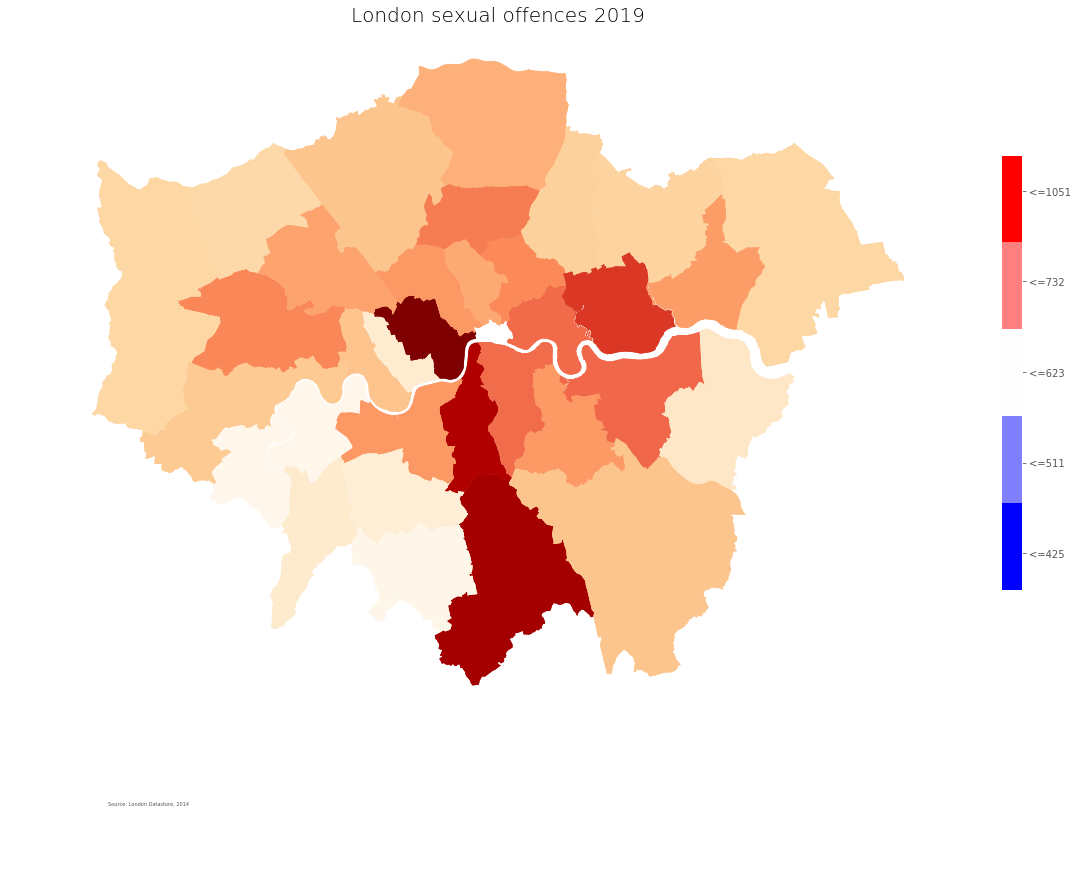

In [117]:
geosexassaults.plot(column='Total', colormap='OrRd', k=5)
#, scheme='quantiles'
plt.title('London sexual offences 2019', \
              fontdict={'fontsize': '20',
                        'fontweight' : '3'})

# create an annotation for the  data source
plt.annotate('Source: London Datastore, 2014',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=5, color='#555555')

#remove axis
plt.axis('off')

cmap = plt.get_cmap('bwr')
colorbar_index(ncolors=5, cmap=cmap, shrink=0.5, labels=bar_labels)
plt.savefig('./data/heat_map/2019map_sexassaults.png')

In [118]:
sexassaults

,MinorText,Total,2019,MajorText
LookUp_BoroughName,,,,
Barking and Dagenham,Other Sexual Offences,617,331,Sexual Offences
Barking and Dagenham,Rape,617,286,Sexual Offences
Barnet,Other Sexual Offences,511,323,Sexual Offences
Barnet,Rape,511,188,Sexual Offences
Bexley,Other Sexual Offences,354,218,Sexual Offences
Bexley,Rape,354,136,Sexual Offences
Brent,Other Sexual Offences,603,380,Sexual Offences
Brent,Rape,603,223,Sexual Offences
Bromley,Other Sexual Offences,511,347,Sexual Offences


                 Quantiles                  
 
 Lower              Upper              Count
           x[i] <=  425.000               14
 425.000 < x[i] <=  511.000               14
 511.000 < x[i] <=  623.400               10
 623.400 < x[i] <=  732.000               14
 732.000 < x[i] <= 1051.000               12
['<=425', '<=511', '<=623', '<=732', '<=1051']


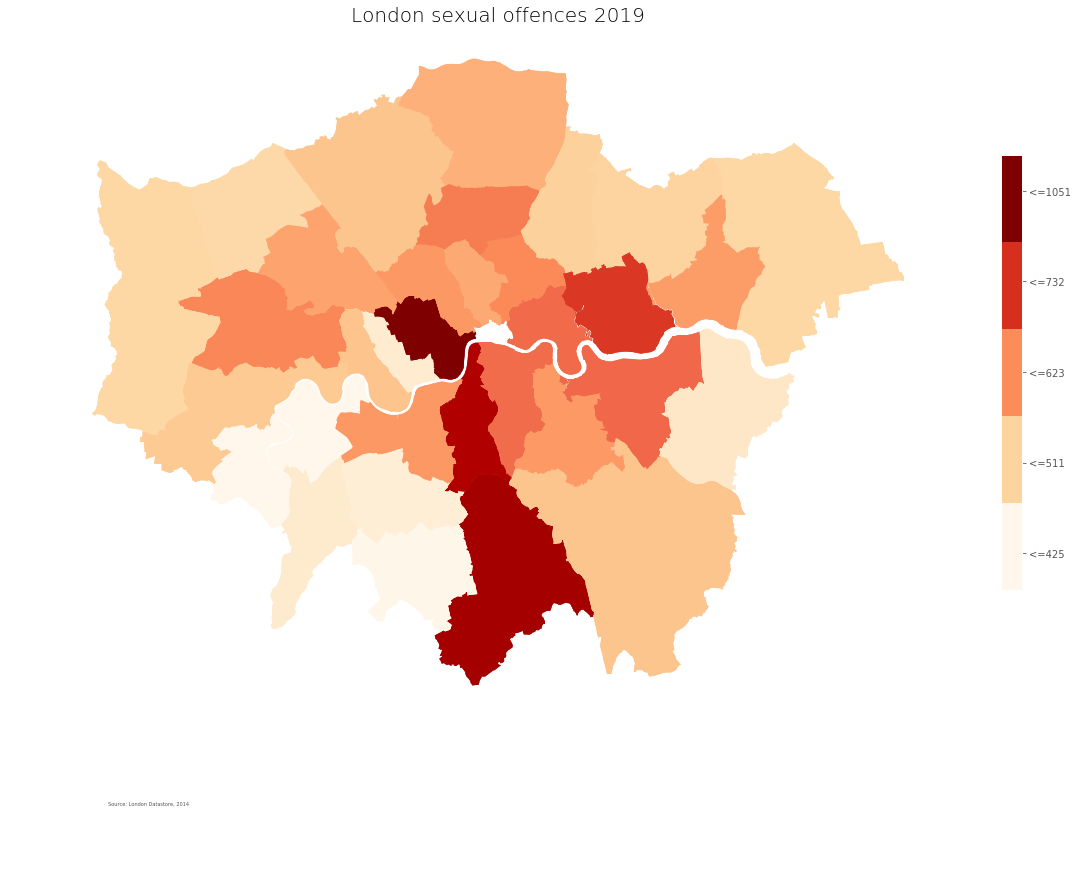

In [79]:
#to get the geographic information: 
original_crs = geosexassaults.crs
target_crs = {'datum':'WGS84', 'no_defs':True, 'proj':'merc'}
projected_geosexassaults = geosexassaults.to_crs(crs=target_crs)

# Convenience functions for working with colour ramps and bars
def colorbar_index(ncolors, cmap, labels=None, **kwargs):
    """
    This is a convenience function to stop you making off-by-one errors
    Takes a standard colour ramp, and discretizes it,
    then draws a colour bar with correctly aligned labels
    """
    cmap = cmap_discretize(cmap, ncolors)
    mappable = plt.cm.ScalarMappable(cmap=cmap)
    mappable.set_array([])
    mappable.set_clim(-0.5, ncolors+0.5)
    colorbar = matplotlib.pyplot.colorbar(mappable, **kwargs)
    colorbar.set_ticks(np.linspace(0, ncolors, ncolors))
    colorbar.set_ticklabels(range(ncolors))
    if labels:
        colorbar.set_ticklabels(labels)
    return colorbar

def cmap_discretize(cmap, N):
    """
    Return a discrete colormap from the continuous colormap cmap.

        cmap: colormap instance, eg. cm.jet. 
        N: number of colors.

    Example
        x = resize(arange(100), (5,100))
        djet = cmap_discretize(cm.jet, 5)
        imshow(x, cmap=djet)

    """
    if type(cmap) == str:
        cmap = get_cmap(cmap)
    colors_i = np.concatenate((np.linspace(0, 1., N), (0., 0., 0., 0.)))
    colors_rgba = cmap(colors_i)
    indices = np.linspace(0, 1., N + 1)
    cdict = {}
    for ki, key in enumerate(('red', 'green', 'blue')):
        cdict[key] = [(indices[i], colors_rgba[i - 1, ki], colors_rgba[i, ki]) for i in xrange(N+1)]
    return matplotlib.colors.LinearSegmentedColormap(cmap.name + "_%d" % N, cdict, 1024)

from pysal.esda.mapclassify import Quantiles

# to create and split values for the colorbar
breaks = Quantiles(
    geosexassaults['Total'].values,
    k=5)
bar_labels = ['<=%i'% b for b in breaks.bins]


geosexassaults.plot(column='Total', colormap='OrRd', k=5)
plt.title('London sexual offences 2019', \
              fontdict={'fontsize': '20',
                        'fontweight' : '3'})

# create an annotation for the  data source
plt.annotate('Source: London Datastore, 2014',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=5, color='#555555')

#remove axis
plt.axis('off')

cmap = plt.get_cmap('OrRd')
colorbar_index(ncolors=5, cmap=cmap, shrink=0.5, labels=bar_labels)
plt.savefig('./data/heat_map/2019map_sexassaults.png')